# 下準備


## Chainer のインストール


In [0]:
!pip install chainer

## Chainerのバージョンの確認

In [0]:
import chainer
print(chainer.__version__)

5.4.0


In [0]:
!python -c 'import chainer; chainer.print_runtime_info()'

Platform: Linux-4.14.79+-x86_64-with-Ubuntu-18.04-bionic
Chainer: 5.4.0
NumPy: 1.16.3
CuPy:
  CuPy Version          : 5.4.0
  CUDA Root             : /usr/local/cuda
  CUDA Build Version    : 10000
  CUDA Driver Version   : 10000
  CUDA Runtime Version  : 10000
  cuDNN Build Version   : 7301
  cuDNN Version         : 7301
  NCCL Build Version    : 2402
  NCCL Runtime Version  : 2402
iDeep: 2.0.0.post3


## Chainer の基本モジュール

In [0]:
import numpy as np
import chainer

## MNISTのデータをロードする

In [0]:
train_data, test_data = chainer.datasets.get_mnist(withlabel=True, ndim=1)
print(train_data)
print(test_data)

## 数字の画像を見る

In [0]:
import matplotlib.pyplot as plt

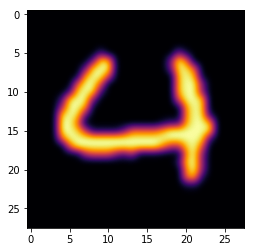

In [0]:
data_location=60
data, teacher_label = train_data[data_location]
plt.imshow(data.reshape(28, 28), cmap='inferno', interpolation='bicubic')
plt.show()

In [0]:
print(teacher_label)

4


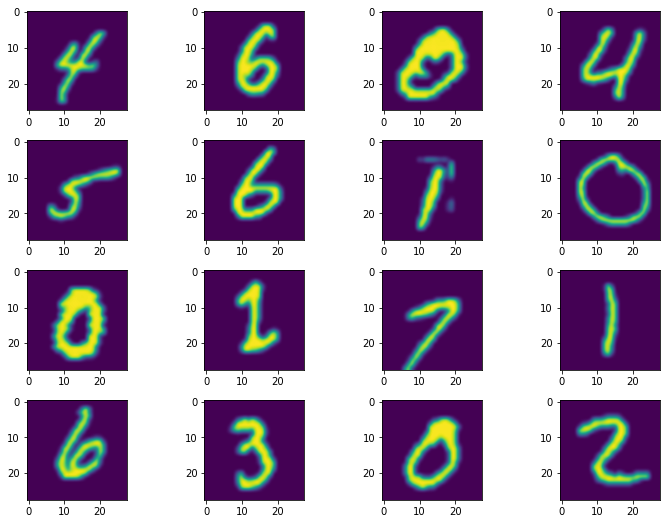

In [0]:
# 数字を表示するための行と列の数
# 行
ROWS_COUNT = 4
# 列
COLUMNS_COUNT = 4
# 
DIGIT_GRAPH_COUNT = ROWS_COUNT * COLUMNS_COUNT
# データオブジェクト保持用
subfig = [] 
# x軸データ
x = np.linspace(-1, 1, 10)

# figureオブジェクト作成サイズを決めます
fig = plt.figure(figsize=(12, 9)) 

#
for i in range(1, DIGIT_GRAPH_COUNT + 1):
    # 順序i番目のsubfigに追加します
    subfig.append(fig.add_subplot(ROWS_COUNT, COLUMNS_COUNT, i))
    # y軸データ(n次式)
    y = x ** i
    data, teacher_label = train_data[60+i]
    subfig[i - 1].imshow(data.reshape(28, 28),interpolation='bicubic', cmap='viridis')
    
# グラフ間の横と縦の間隔の調整
fig.subplots_adjust(wspace=0.3, hspace=0.3) 
plt.show()

## 学習用データセットと検証用データセットの数

In [0]:
print('学習用データセットの数:', len(train_data))
print('検証用データセットの数:', len(test_data))

学習用データセットの数: 60000
検証用データセットの数: 10000


# 調理手順

## 始めよう


In [0]:
import chainer
import chainer.links as L
import chainer.functions as F

In [0]:
#GPU_ID = -1

## ニューラルネットワークの定義

In [0]:
class MLP(chainer.Chain):
  def __init__(self, number_hidden_units=1000, number_out_units=10):
    # 親クラスのコンストラクタを呼び出し、必要な初期化を行います。
    super(MLP, self).__init__()
    #
    with self.init_scope():
      self.layer1=L.Linear(None, number_hidden_units)
      self.layer2=L.Linear(number_hidden_units, number_hidden_units)
      self.layer3=L.Linear(number_hidden_units, number_out_units)

  def __call__(self, input_data):
    # 
    result1 = F.relu(self.layer1(input_data))
    result2 = F.relu(self.layer2(result1))
    return self.layer3(result2)

In [0]:
model = MLP()

In [0]:
print('入力層のバイアスパラメータ配列の形は', model.layer1.b.shape)
#
print('初期化直後のその値は、', model.layer1.b.data)

入力層のバイアスパラメータ配列の形は (1000,)
初期化直後のその値は、 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.

In [0]:
print('学習前の入力層の重み配列',model.layer1.W.array)

学習前の入力層の重み配列 None


## iteratorsとは

In [0]:
from chainer import iterators

BATCH_SIZE = 100

train_iterator = iterators.SerialIterator(train_data, BATCH_SIZE)
test_iterator = iterators.SerialIterator(test_data, BATCH_SIZE,
                                     repeat=False, shuffle=False)

## optimizerの設定

In [0]:
from chainer import optimizers

optimizer = optimizers.SGD(lr=0.01)
optimizer.setup(model)

## 検証の処理ブロック

In [0]:
import numpy as np
from chainer.dataset import concat_examples
# from chainer.cuda import to_cpu
import matplotlib.pyplot as plt

MAX_EPOCH = 20

In [0]:
def testEpoch(train_iterator,loss):
# 学習誤差の表示
#   print('学習回数:{:02d} --> 学習誤差:{:.02f} '.format(
#       train_iterator.epoch, float(to_cpu(loss.data))), end='')

  print('学習回数:{:02d} --> 学習誤差:{:.02f} '.format(
      train_iterator.epoch, float(loss.data)), end='')
  # 検証用誤差と精度
  test_losses = []
  test_accuracies = []
  #
  while True:
    test_dataset = test_iterator.next()
    test_data, test_teacher_labels = concat_examples(test_dataset)

    # 検証データをモデルに渡します
    prediction_test = model(test_data)

    # 検証データに対して得られた予測値と教師ラベルデータと比較して、誤差の計算をします
    loss_test = F.softmax_cross_entropy(prediction_test, test_teacher_labels)
#     test_losses.append(to_cpu(loss_test.data))
    test_losses.append(loss_test.data)


    # 精度を計算します
    accuracy = F.accuracy(prediction_test, test_teacher_labels)
#     accuracy.to_cpu()
    test_accuracies.append(accuracy.data)
            
    if test_iterator.is_new_epoch:
      test_iterator.epoch = 0
      test_iterator.current_position = 0
      test_iterator.is_new_epoch = False
      test_iterator._pushed_position = None
      break

    print('検証誤差:{:.04f} 検証精度:{:.02f}'.format(
          np.mean(test_losses), np.mean(test_accuracies)))

## 学習と検証

In [0]:
while train_iterator.epoch < MAX_EPOCH:
  # 学習データセットを反復子から取り出します
  train_dataset = train_iterator.next()
  
  # 学習データを学習データと教師ラベルデータにアンパックします
  train_data, teacher_labels = concat_examples(train_dataset)
  
  # モデルにかけて、予測値の計算をします
  prediction_train = model(train_data)

  # 得られた予測値と教師ラベルデータと比較して、学習誤差の計算をします
  loss = F.softmax_cross_entropy(prediction_train, teacher_labels)

  # ニューラルネットワークの中の勾配の計算をします
  model.cleargrads()
  # 誤差を逆伝播します
  loss.backward()

  # 誤差を反映して、パラメータの更新をします
  optimizer.update()
  # 一回学習（epoch）が終わったら検証データに対する予測精度を計ります
  if train_iterator.is_new_epoch:
    testEpoch(train_iterator,loss)

学習回数:01 --> 学習誤差:0.51 検証誤差:0.5173 検証精度:0.87
検証誤差:0.4978 検証精度:0.89
検証誤差:0.5006 検証精度:0.88
検証誤差:0.5195 検証精度:0.88
検証誤差:0.5377 検証精度:0.87
検証誤差:0.5548 検証精度:0.86
検証誤差:0.5669 検証精度:0.85
検証誤差:0.5538 検証精度:0.86
検証誤差:0.5399 検証精度:0.86
検証誤差:0.5465 検証精度:0.86
検証誤差:0.5469 検証精度:0.86
検証誤差:0.5547 検証精度:0.86
検証誤差:0.5811 検証精度:0.85
検証誤差:0.5810 検証精度:0.85
検証誤差:0.5812 検証精度:0.85
検証誤差:0.5845 検証精度:0.85
検証誤差:0.5861 検証精度:0.85
検証誤差:0.5963 検証精度:0.85
検証誤差:0.5930 検証精度:0.85
検証誤差:0.5912 検証精度:0.85
検証誤差:0.5967 検証精度:0.85
検証誤差:0.6045 検証精度:0.84
検証誤差:0.6065 検証精度:0.84
検証誤差:0.6050 検証精度:0.84
検証誤差:0.6017 検証精度:0.84
検証誤差:0.6020 検証精度:0.84
検証誤差:0.6026 検証精度:0.84
検証誤差:0.5996 検証精度:0.84
検証誤差:0.5941 検証精度:0.85
検証誤差:0.5941 検証精度:0.85
検証誤差:0.5895 検証精度:0.85
検証誤差:0.5898 検証精度:0.85
検証誤差:0.5875 検証精度:0.85
検証誤差:0.5861 検証精度:0.85
検証誤差:0.5839 検証精度:0.85
検証誤差:0.5875 検証精度:0.85
検証誤差:0.5839 検証精度:0.85
検証誤差:0.5888 検証精度:0.85
検証誤差:0.5940 検証精度:0.84
検証誤差:0.5947 検証精度:0.84
検証誤差:0.5942 検証精度:0.84
検証誤差:0.5940 検証精度:0.85
検証誤差:0.5966 検証精度:0.84
検証誤差:0.5968 検証精度:0.84
検証誤差:0.598

学習の後、もう一回見てみましょう。


In [0]:
print('入力層のバイアスパラメータ配列の形状は', model.layer1.b.shape)
#
print('学習後の入力層の値は、', model.layer1.b.data)
# 入力層の重み配列
print('学習後の入力層の重み配列',model.layer1.W.array)
print('学習後の入力層の重み配列の形状は',model.layer1.W.array.shape)

入力層のバイアスパラメータ配列の形状は (1000,)
学習後の入力層の値は、 [-3.11550312e-03  3.60031030e-03  6.09006640e-03 -2.32307892e-03
 -7.35498732e-03  1.28033394e-02  1.59830097e-02  6.61864411e-03
  2.61563761e-03  6.17354596e-03  6.91864593e-03 -1.73253077e-03
  4.40174295e-03  2.08901544e-03  1.18189082e-02  4.37337020e-03
  1.34764938e-03  6.93072286e-03  9.20397136e-03  1.04857283e-03
  4.67344886e-03  1.63002945e-02 -6.61524944e-03  5.92294382e-04
  2.22960487e-03  1.36992820e-02 -1.60982870e-02 -1.23843004e-03
  7.68685713e-03  5.07056667e-03  9.43481550e-03  1.70095209e-02
  1.15884002e-02  1.84916407e-02  1.61557943e-02  5.04792435e-03
  4.65584593e-03 -1.66917741e-02  9.55675030e-04 -8.19864310e-03
  4.49562445e-03  4.55997279e-03  4.54391772e-03  1.57730430e-02
  1.01812948e-02  5.66577353e-03  1.83030181e-02  2.17375699e-02
  1.81889534e-02  3.53463064e-03  1.03536239e-02  1.41927944e-02
  5.07392688e-03  7.25195231e-03  1.13024423e-02  1.03019141e-02
  5.70348138e-03  1.41385691e-02  2.05518631e-03 -

## 学習済モデルの保存

In [0]:
from chainer import serializers

serializers.save_npz('chainer-mnist.model', model)

# 保存されているかどうかを確認します
%ls -la

total 6536
drwxr-xr-x 1 root root    4096 May  7 07:21 ./
drwxr-xr-x 1 root root    4096 May  7 07:10 ../
-rw-r--r-- 1 root root 6674786 May  7 07:21 chainer-mnist.model
drwxr-xr-x 1 root root    4096 Apr 29 16:32 .config/
drwxr-xr-x 1 root root    4096 Apr 29 16:32 sample_data/


## 学習済モデルのダウンロード

In [0]:
from google.colab import files
files.download('chainer-mnist.model')

## 学習済のモデルを使う


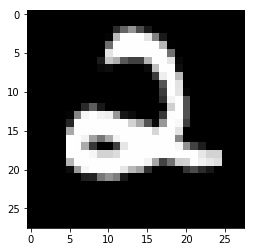

predict_lable: 2


In [0]:
model = MLP()

# 学習済モデルファイルをロードします
serializers.load_npz('chainer-mnist.model', model)

train_data, test_data = chainer.datasets.get_mnist(withlabel=True, ndim=1)
data_location=6423
# 検証データの一つを使います
predict_data, predict_lable = test_data[data_location]
plt.imshow(predict_data.reshape(28, 28), cmap='gray')
plt.show()
print('predict_lable:', predict_lable)

In [0]:
# 分類したいデータをモデルに渡します
predict_data = predict_data[None, ...]
#
predict = model(predict_data)
result= predict.array
print(result)
probable_label = result.argmax(axis=1)
print('一番可能性の高いのは:', probable_label[0])

[[ 3.373366  -7.4990873 15.473031   0.7109742  1.2758081 -3.462699
   5.1708446 -9.236255   0.9145651 -5.2367353]]
一番可能性の高いのは: 2
